In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils
from keras import initializers, optimizers

## Load DataSet

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [0]:
import numpy as np
a = np.mean(train_set_X, axis=(0))
train_set_X = train_set_X - a
test_set_X = test_set_X - a

In [40]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [41]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [42]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_1', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(32, kernel_size = (3, 3),
                 input_shape = input_shape,
                 name = 'conv_layer_2', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))


#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_3', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(64, kernel_size = (3, 3),
                 name = 'conv_layer_4', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))


#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 name = 'conv_layer_5', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))
model.add(Dropout(0.5))
#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer', kernel_initializer = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None), bias_initializer='zeros'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adamax',
              metrics=['accuracy'])

In [46]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 437us/step - loss: 1.3978 - acc: 0.4956 - val_loss: 1.1549 - val_acc: 0.5874
Epoch 2/100
44100/50000 [=========================>....] - ETA: 2s - loss: 1.0288 - acc: 0.6357

50000/50000 [==============================] - 20s 397us/step - loss: 1.0211 - acc: 0.6386 - val_loss: 1.1350 - val_acc: 0.5927
Epoch 3/100
50000/50000 [==============================] - 19s 389us/step - loss: 0.8588 - acc: 0.6998 - val_loss: 0.9579 - val_acc: 0.6686
Epoch 4/100
22300/50000 [============>.................] - ETA: 9s - loss: 0.7486 - acc: 0.7378

50000/50000 [==============================] - 19s 371us/step - loss: 0.7523 - acc: 0.7358 - val_loss: 0.8430 - val_acc: 0.7072
Epoch 5/100
50000/50000 [==============================] - 18s 354us/step - loss: 0.6648 - acc: 0.7700 - val_loss: 0.8695 - val_acc: 0.7034
Epoch 6/100
15700/50000 [========>.....................] - ETA: 10s - loss: 0.5759 - acc: 0.7977

50000/50000 [==============================] - 17s 345us/step - loss: 0.5889 - acc: 0.7939 - val_loss: 0.8328 - val_acc: 0.7232
Epoch 7/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.5311 - acc: 0.8138 - val_loss: 0.7872 - val_acc: 0.7369
Epoch 8/100
15300/50000 [========>.....................] - ETA: 11s - loss: 0.4413 - acc: 0.8459

50000/50000 [==============================] - 17s 345us/step - loss: 0.4721 - acc: 0.8358 - val_loss: 0.8865 - val_acc: 0.7154
Epoch 9/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.4203 - acc: 0.8520 - val_loss: 0.8742 - val_acc: 0.7287
Epoch 10/100
15500/50000 [========>.....................] - ETA: 10s - loss: 0.3477 - acc: 0.8796

50000/50000 [==============================] - 17s 342us/step - loss: 0.3689 - acc: 0.8703 - val_loss: 0.8886 - val_acc: 0.7312
Epoch 11/100
50000/50000 [==============================] - 17s 345us/step - loss: 0.3309 - acc: 0.8828 - val_loss: 0.9678 - val_acc: 0.7262
Epoch 12/100
14700/50000 [=======>......................] - ETA: 11s - loss: 0.2506 - acc: 0.9114

50000/50000 [==============================] - 17s 345us/step - loss: 0.2854 - acc: 0.8979 - val_loss: 0.9722 - val_acc: 0.7323
Epoch 13/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.2586 - acc: 0.9096 - val_loss: 1.0714 - val_acc: 0.7204
Epoch 14/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.1998 - acc: 0.9301

50000/50000 [==============================] - 17s 344us/step - loss: 0.2289 - acc: 0.9185 - val_loss: 1.0417 - val_acc: 0.7323
Epoch 15/100
50000/50000 [==============================] - 17s 348us/step - loss: 0.2067 - acc: 0.9264 - val_loss: 1.1770 - val_acc: 0.7220
Epoch 16/100
14100/50000 [=======>......................] - ETA: 11s - loss: 0.1557 - acc: 0.9455

50000/50000 [==============================] - 17s 347us/step - loss: 0.1847 - acc: 0.9350 - val_loss: 1.1327 - val_acc: 0.7281
Epoch 17/100
50000/50000 [==============================] - 17s 348us/step - loss: 0.1704 - acc: 0.9395 - val_loss: 1.1118 - val_acc: 0.7302
Epoch 18/100
13900/50000 [=======>......................] - ETA: 11s - loss: 0.1226 - acc: 0.9572

50000/50000 [==============================] - 17s 347us/step - loss: 0.1459 - acc: 0.9480 - val_loss: 1.1906 - val_acc: 0.7349
Epoch 19/100
50000/50000 [==============================] - 17s 345us/step - loss: 0.1399 - acc: 0.9508 - val_loss: 1.2960 - val_acc: 0.7111
Epoch 20/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.1120 - acc: 0.9617

50000/50000 [==============================] - 17s 349us/step - loss: 0.1271 - acc: 0.9553 - val_loss: 1.2757 - val_acc: 0.7237
Epoch 21/100
50000/50000 [==============================] - 18s 364us/step - loss: 0.1172 - acc: 0.9583 - val_loss: 1.4353 - val_acc: 0.7172
Epoch 22/100
14200/50000 [=======>......................] - ETA: 12s - loss: 0.0915 - acc: 0.9696

50000/50000 [==============================] - 19s 371us/step - loss: 0.1096 - acc: 0.9615 - val_loss: 1.3722 - val_acc: 0.7269
Epoch 23/100
50000/50000 [==============================] - 18s 369us/step - loss: 0.0986 - acc: 0.9647 - val_loss: 1.2962 - val_acc: 0.7327
Epoch 24/100
12900/50000 [======>.......................] - ETA: 12s - loss: 0.0805 - acc: 0.9719

50000/50000 [==============================] - 18s 368us/step - loss: 0.1004 - acc: 0.9650 - val_loss: 1.4166 - val_acc: 0.7275
Epoch 25/100
50000/50000 [==============================] - 18s 369us/step - loss: 0.0893 - acc: 0.9680 - val_loss: 1.6869 - val_acc: 0.7003
Epoch 26/100
13500/50000 [=======>......................] - ETA: 12s - loss: 0.0725 - acc: 0.9750

50000/50000 [==============================] - 18s 361us/step - loss: 0.0863 - acc: 0.9701 - val_loss: 1.4039 - val_acc: 0.7271
Epoch 27/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.0798 - acc: 0.9722 - val_loss: 1.4587 - val_acc: 0.7230
Epoch 28/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0653 - acc: 0.9766

50000/50000 [==============================] - 17s 343us/step - loss: 0.0805 - acc: 0.9709 - val_loss: 1.5628 - val_acc: 0.7171
Epoch 29/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0731 - acc: 0.9738 - val_loss: 1.4568 - val_acc: 0.7328
Epoch 30/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0643 - acc: 0.9777

50000/50000 [==============================] - 17s 343us/step - loss: 0.0718 - acc: 0.9747 - val_loss: 1.5600 - val_acc: 0.7266
Epoch 31/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0714 - acc: 0.9750 - val_loss: 1.5072 - val_acc: 0.7306
Epoch 32/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0525 - acc: 0.9817

50000/50000 [==============================] - 17s 343us/step - loss: 0.0614 - acc: 0.9784 - val_loss: 1.7110 - val_acc: 0.7096
Epoch 33/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0649 - acc: 0.9770 - val_loss: 1.7448 - val_acc: 0.7170
Epoch 34/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0566 - acc: 0.9797

50000/50000 [==============================] - 17s 344us/step - loss: 0.0646 - acc: 0.9764 - val_loss: 1.6476 - val_acc: 0.7220
Epoch 35/100
50000/50000 [==============================] - 17s 341us/step - loss: 0.0556 - acc: 0.9805 - val_loss: 1.6412 - val_acc: 0.7261
Epoch 36/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0510 - acc: 0.9821

50000/50000 [==============================] - 17s 342us/step - loss: 0.0584 - acc: 0.9792 - val_loss: 1.6293 - val_acc: 0.7276
Epoch 37/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0546 - acc: 0.9807 - val_loss: 1.8289 - val_acc: 0.7034
Epoch 38/100
15000/50000 [========>.....................] - ETA: 11s - loss: 0.0457 - acc: 0.9848

50000/50000 [==============================] - 17s 345us/step - loss: 0.0502 - acc: 0.9828 - val_loss: 1.6291 - val_acc: 0.7300
Epoch 39/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0519 - acc: 0.9812 - val_loss: 1.6557 - val_acc: 0.7355
Epoch 40/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0389 - acc: 0.9874

50000/50000 [==============================] - 17s 343us/step - loss: 0.0484 - acc: 0.9830 - val_loss: 1.6774 - val_acc: 0.7250
Epoch 41/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0466 - acc: 0.9837 - val_loss: 1.7867 - val_acc: 0.7168
Epoch 42/100
14700/50000 [=======>......................] - ETA: 11s - loss: 0.0402 - acc: 0.9857

50000/50000 [==============================] - 17s 342us/step - loss: 0.0462 - acc: 0.9840 - val_loss: 1.6984 - val_acc: 0.7323
Epoch 43/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0452 - acc: 0.9840 - val_loss: 1.8038 - val_acc: 0.7226
Epoch 44/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0420 - acc: 0.9848

50000/50000 [==============================] - 17s 341us/step - loss: 0.0482 - acc: 0.9830 - val_loss: 1.6842 - val_acc: 0.7335
Epoch 45/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.0452 - acc: 0.9843 - val_loss: 1.7761 - val_acc: 0.7236
Epoch 46/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0347 - acc: 0.9891

50000/50000 [==============================] - 18s 351us/step - loss: 0.0413 - acc: 0.9861 - val_loss: 1.8248 - val_acc: 0.7224
Epoch 47/100
50000/50000 [==============================] - 18s 368us/step - loss: 0.0414 - acc: 0.9856 - val_loss: 1.7920 - val_acc: 0.7310
Epoch 48/100
12500/50000 [======>.......................] - ETA: 12s - loss: 0.0342 - acc: 0.9878

50000/50000 [==============================] - 18s 368us/step - loss: 0.0414 - acc: 0.9859 - val_loss: 1.8533 - val_acc: 0.7229
Epoch 49/100
50000/50000 [==============================] - 18s 369us/step - loss: 0.0394 - acc: 0.9865 - val_loss: 1.6849 - val_acc: 0.7387
Epoch 50/100
12100/50000 [======>.......................] - ETA: 13s - loss: 0.0276 - acc: 0.9904

50000/50000 [==============================] - 19s 372us/step - loss: 0.0361 - acc: 0.9878 - val_loss: 1.9307 - val_acc: 0.7117
Epoch 51/100
50000/50000 [==============================] - 18s 366us/step - loss: 0.0422 - acc: 0.9855 - val_loss: 1.8488 - val_acc: 0.7224
Epoch 52/100
12700/50000 [======>.......................] - ETA: 11s - loss: 0.0294 - acc: 0.9896

50000/50000 [==============================] - 17s 342us/step - loss: 0.0365 - acc: 0.9873 - val_loss: 1.7862 - val_acc: 0.7257
Epoch 53/100
50000/50000 [==============================] - 17s 340us/step - loss: 0.0365 - acc: 0.9869 - val_loss: 1.7948 - val_acc: 0.7239
Epoch 54/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0266 - acc: 0.9910

50000/50000 [==============================] - 17s 343us/step - loss: 0.0335 - acc: 0.9887 - val_loss: 1.8417 - val_acc: 0.7247
Epoch 55/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0314 - acc: 0.9891 - val_loss: 1.8986 - val_acc: 0.7308
Epoch 56/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0335 - acc: 0.9877

50000/50000 [==============================] - 17s 344us/step - loss: 0.0352 - acc: 0.9876 - val_loss: 1.9198 - val_acc: 0.7248
Epoch 57/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.0333 - acc: 0.9881 - val_loss: 1.9444 - val_acc: 0.7138
Epoch 58/100
14100/50000 [=======>......................] - ETA: 11s - loss: 0.0314 - acc: 0.9889

50000/50000 [==============================] - 17s 347us/step - loss: 0.0328 - acc: 0.9887 - val_loss: 1.8352 - val_acc: 0.7308
Epoch 59/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0339 - acc: 0.9885 - val_loss: 1.9127 - val_acc: 0.7256
Epoch 60/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0312 - acc: 0.9898

50000/50000 [==============================] - 17s 349us/step - loss: 0.0321 - acc: 0.9894 - val_loss: 1.8426 - val_acc: 0.7262
Epoch 61/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.0311 - acc: 0.9891 - val_loss: 1.8595 - val_acc: 0.7260
Epoch 62/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0230 - acc: 0.9919

50000/50000 [==============================] - 17s 343us/step - loss: 0.0287 - acc: 0.9905 - val_loss: 1.9781 - val_acc: 0.7224
Epoch 63/100
50000/50000 [==============================] - 17s 341us/step - loss: 0.0301 - acc: 0.9901 - val_loss: 1.8810 - val_acc: 0.7281
Epoch 64/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0253 - acc: 0.9915

50000/50000 [==============================] - 17s 343us/step - loss: 0.0308 - acc: 0.9896 - val_loss: 1.9146 - val_acc: 0.7191
Epoch 65/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0306 - acc: 0.9896 - val_loss: 1.9254 - val_acc: 0.7270
Epoch 66/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0274 - acc: 0.9915

50000/50000 [==============================] - 17s 345us/step - loss: 0.0279 - acc: 0.9906 - val_loss: 1.9900 - val_acc: 0.7219
Epoch 67/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0259 - acc: 0.9911 - val_loss: 1.9012 - val_acc: 0.7278
Epoch 68/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0258 - acc: 0.9905

50000/50000 [==============================] - 17s 342us/step - loss: 0.0293 - acc: 0.9898 - val_loss: 1.9429 - val_acc: 0.7236
Epoch 69/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.0285 - acc: 0.9904 - val_loss: 1.8965 - val_acc: 0.7326
Epoch 70/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0203 - acc: 0.9929

50000/50000 [==============================] - 17s 342us/step - loss: 0.0270 - acc: 0.9907 - val_loss: 1.9368 - val_acc: 0.7266
Epoch 71/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0277 - acc: 0.9903 - val_loss: 1.9830 - val_acc: 0.7189
Epoch 72/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0206 - acc: 0.9922

50000/50000 [==============================] - 17s 342us/step - loss: 0.0235 - acc: 0.9918 - val_loss: 1.9444 - val_acc: 0.7205
Epoch 73/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0263 - acc: 0.9909 - val_loss: 1.9099 - val_acc: 0.7278
Epoch 74/100
14500/50000 [=======>......................] - ETA: 11s - loss: 0.0261 - acc: 0.9917

50000/50000 [==============================] - 18s 357us/step - loss: 0.0261 - acc: 0.9912 - val_loss: 1.9327 - val_acc: 0.7249
Epoch 75/100
50000/50000 [==============================] - 18s 362us/step - loss: 0.0241 - acc: 0.9918 - val_loss: 2.0398 - val_acc: 0.7199
Epoch 76/100
13100/50000 [======>.......................] - ETA: 12s - loss: 0.0211 - acc: 0.9924

50000/50000 [==============================] - 18s 363us/step - loss: 0.0217 - acc: 0.9927 - val_loss: 1.9336 - val_acc: 0.7295
Epoch 77/100
50000/50000 [==============================] - 18s 362us/step - loss: 0.0246 - acc: 0.9910 - val_loss: 1.9647 - val_acc: 0.7265
Epoch 78/100
10500/50000 [=====>........................] - ETA: 13s - loss: 0.0160 - acc: 0.9944

50000/50000 [==============================] - 18s 364us/step - loss: 0.0206 - acc: 0.9931 - val_loss: 2.1299 - val_acc: 0.7193
Epoch 79/100
50000/50000 [==============================] - 18s 363us/step - loss: 0.0267 - acc: 0.9909 - val_loss: 1.9227 - val_acc: 0.7297
Epoch 80/100
12100/50000 [======>.......................] - ETA: 12s - loss: 0.0294 - acc: 0.9909

50000/50000 [==============================] - 17s 342us/step - loss: 0.0250 - acc: 0.9917 - val_loss: 1.9692 - val_acc: 0.7241
Epoch 81/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 2.0819 - val_acc: 0.7252
Epoch 82/100
13900/50000 [=======>......................] - ETA: 11s - loss: 0.0194 - acc: 0.9927

50000/50000 [==============================] - 17s 343us/step - loss: 0.0209 - acc: 0.9930 - val_loss: 1.9763 - val_acc: 0.7310
Epoch 83/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0210 - acc: 0.9931 - val_loss: 2.0547 - val_acc: 0.7298
Epoch 84/100
13900/50000 [=======>......................] - ETA: 11s - loss: 0.0232 - acc: 0.9919

50000/50000 [==============================] - 17s 343us/step - loss: 0.0220 - acc: 0.9928 - val_loss: 1.9839 - val_acc: 0.7325
Epoch 85/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0188 - acc: 0.9938 - val_loss: 2.0986 - val_acc: 0.7243
Epoch 86/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0194 - acc: 0.9928

50000/50000 [==============================] - 17s 343us/step - loss: 0.0218 - acc: 0.9923 - val_loss: 1.9847 - val_acc: 0.7292
Epoch 87/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0202 - acc: 0.9929 - val_loss: 2.0295 - val_acc: 0.7232
Epoch 88/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0187 - acc: 0.9938

50000/50000 [==============================] - 17s 345us/step - loss: 0.0208 - acc: 0.9931 - val_loss: 2.0642 - val_acc: 0.7296
Epoch 89/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0217 - acc: 0.9925 - val_loss: 2.1848 - val_acc: 0.7154
Epoch 90/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0161 - acc: 0.9950

50000/50000 [==============================] - 17s 342us/step - loss: 0.0208 - acc: 0.9930 - val_loss: 2.0218 - val_acc: 0.7293
Epoch 91/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.0179 - acc: 0.9937 - val_loss: 2.0324 - val_acc: 0.7291
Epoch 92/100
14700/50000 [=======>......................] - ETA: 11s - loss: 0.0162 - acc: 0.9946

50000/50000 [==============================] - 17s 346us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 2.2391 - val_acc: 0.7139
Epoch 93/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0212 - acc: 0.9926 - val_loss: 2.1447 - val_acc: 0.7208
Epoch 94/100
15100/50000 [========>.....................] - ETA: 11s - loss: 0.0227 - acc: 0.9926

50000/50000 [==============================] - 17s 344us/step - loss: 0.0214 - acc: 0.9929 - val_loss: 2.0310 - val_acc: 0.7232
Epoch 95/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 2.0722 - val_acc: 0.7233
Epoch 96/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0158 - acc: 0.9941

50000/50000 [==============================] - 17s 342us/step - loss: 0.0186 - acc: 0.9932 - val_loss: 2.0495 - val_acc: 0.7273
Epoch 97/100
50000/50000 [==============================] - 17s 342us/step - loss: 0.0206 - acc: 0.9932 - val_loss: 2.0546 - val_acc: 0.7318
Epoch 98/100
14300/50000 [=======>......................] - ETA: 11s - loss: 0.0188 - acc: 0.9942

50000/50000 [==============================] - 17s 343us/step - loss: 0.0187 - acc: 0.9938 - val_loss: 2.0924 - val_acc: 0.7272
Epoch 99/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.0181 - acc: 0.9935 - val_loss: 2.0986 - val_acc: 0.7302
Epoch 100/100
14900/50000 [=======>......................] - ETA: 11s - loss: 0.0169 - acc: 0.9941

50000/50000 [==============================] - 17s 344us/step - loss: 0.0192 - acc: 0.9936 - val_loss: 2.0762 - val_acc: 0.7271


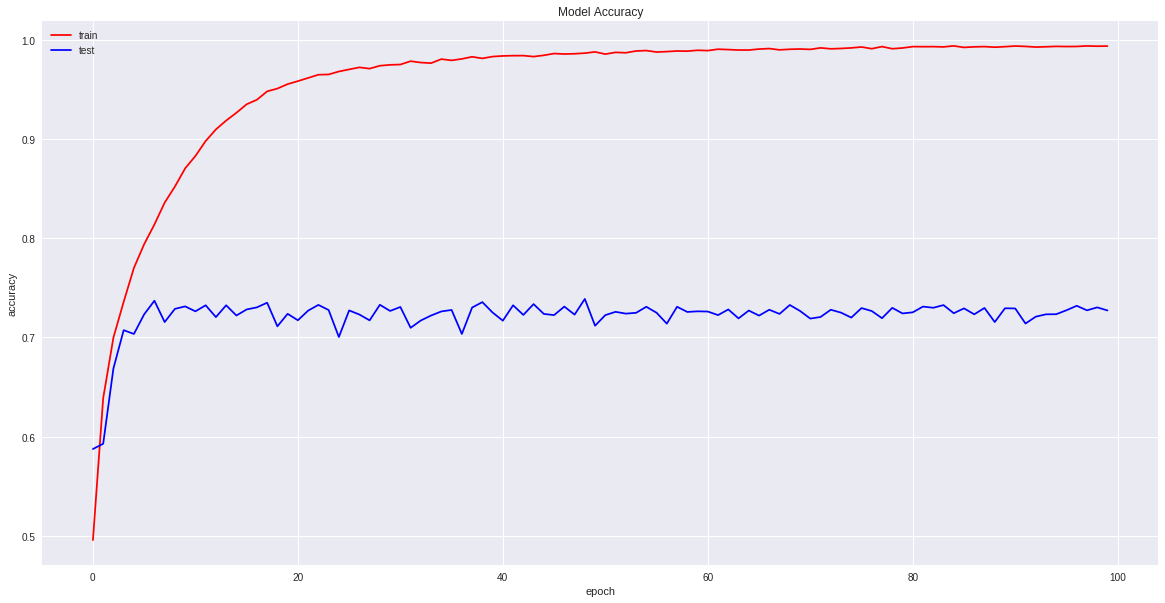

In [47]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


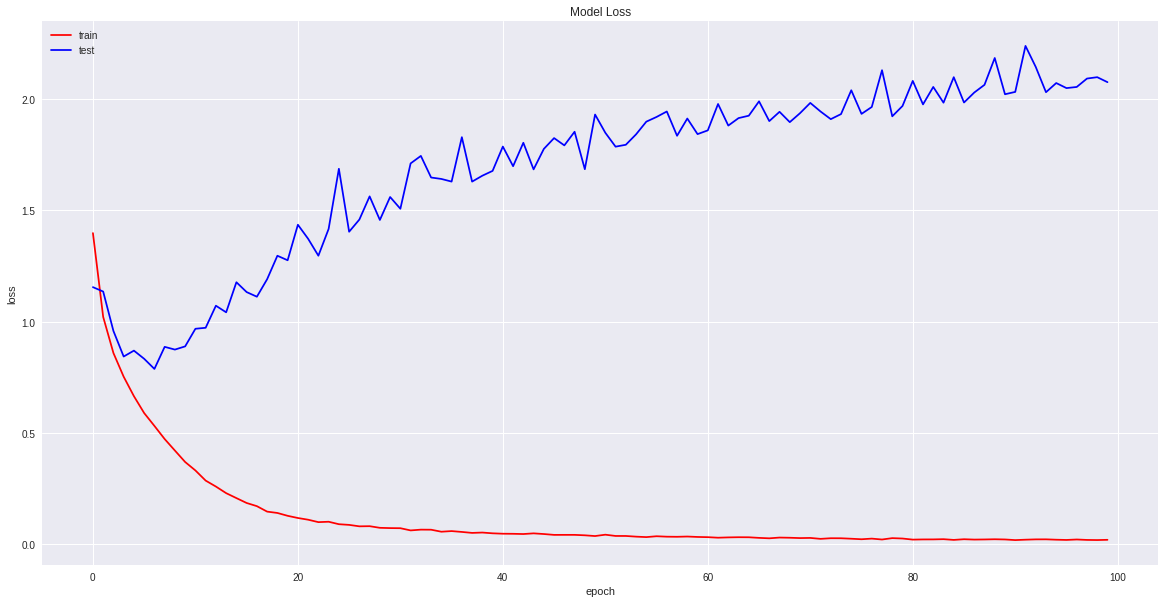

In [48]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        5.3G        156M        253M        7.3G        7.0G
Swap:            0B          0B          0B
